In [1]:
import os
import sys
import networkx as nx
from epynet import Network

sys.path.insert(0, os.path.join('..', 'utils'))
from graph_utils import get_nx_graph

In [2]:
wds_id = 'anytown'

In [3]:
path_to_data = os.path.join('..', 'data', 'db_'+wds_id+'_doe_pumpfed_1')
path_to_wds = os.path.join('..', 'water_networks', wds_id+'.inp')

### Loading WDS topology

In [4]:
wds = Network(path_to_wds)
G = get_nx_graph(wds, mode='weighted')

In [5]:
coords = {}
for node in wds.nodes:
    arr = [node.coordinates[0], node.coordinates[1]]
    coords[int(node.index)] = arr

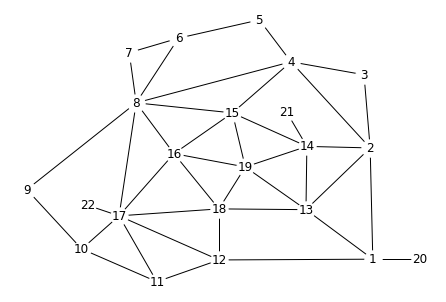

In [6]:
nx.draw(G, pos=coords, with_labels=True, node_color='#ffffff')

### Collecting master nodes

In [7]:
master_nodes = set()
# for reservoir in wds.reservoirs:
#     master_nodes.add(reservoir.index)
for tank in wds.tanks:
    master_nodes.add(wds.links[list(tank.links.keys())[0]].from_node.index)
for pump in wds.pumps:
    master_nodes.add(pump.to_node.index)

In [8]:
for node in master_nodes:
    print(node)

20
21
22
